In [1]:
import os
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import re
from collections import defaultdict
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

2024-11-03 17:27:01.067473: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 5s 0us/step


In [3]:
print('Train Images Shape:      ', x_train.shape)
print('Train Labels Shape:      ', y_train.shape)


print('\nTest Images Shape:       ', x_test.shape)
print('Test Labels Shape:       ', y_test.shape)

Train Images Shape:       (50000, 32, 32, 3)
Train Labels Shape:       (50000, 1)

Test Images Shape:        (10000, 32, 32, 3)
Test Labels Shape:        (10000, 1)


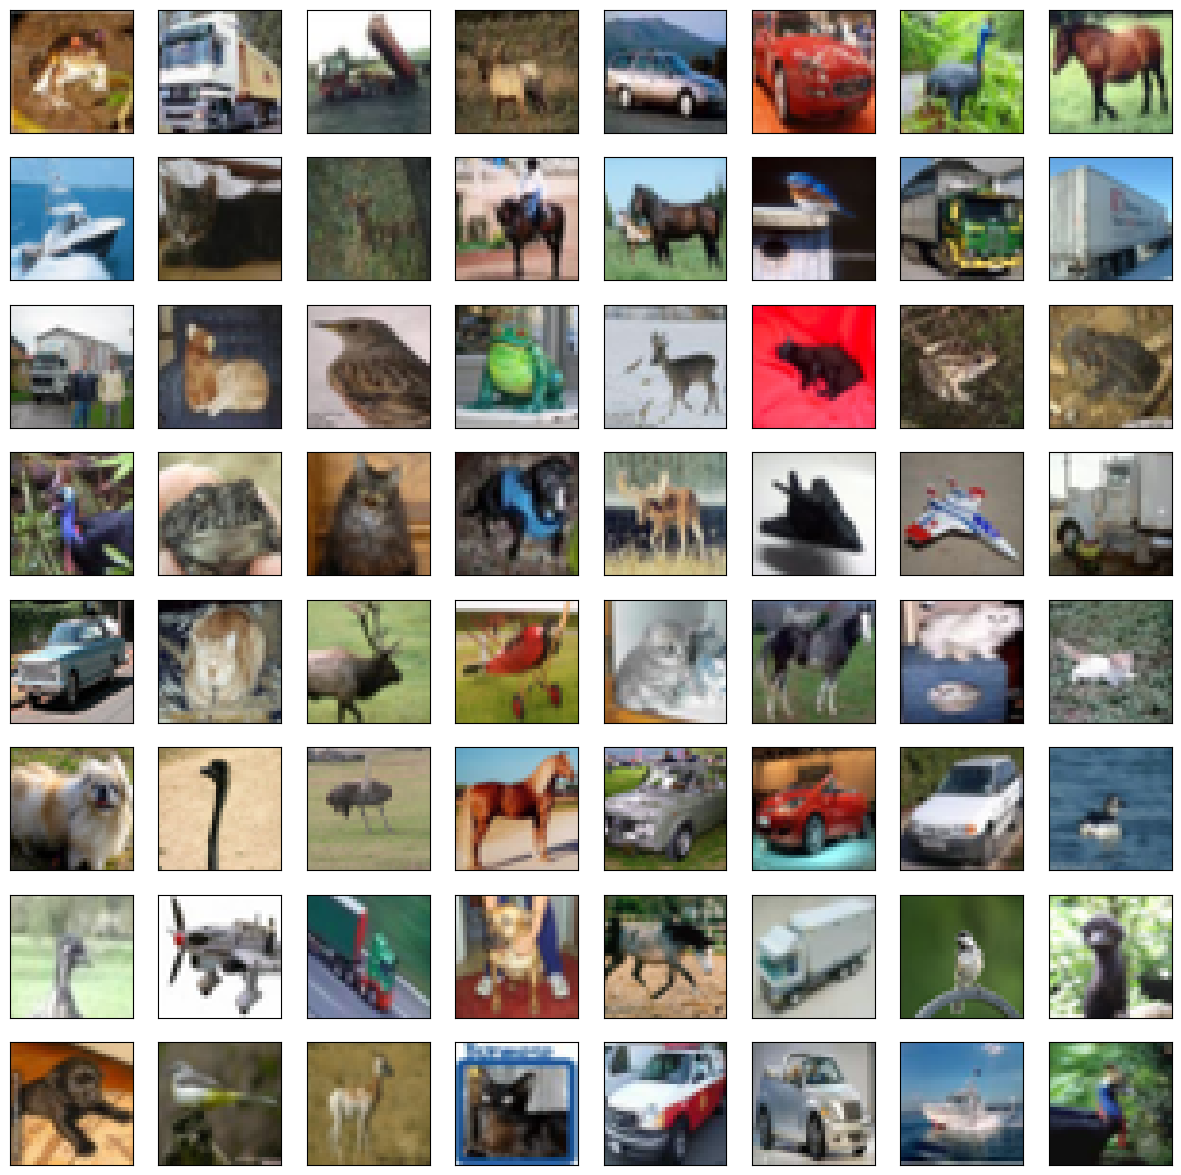

In [4]:
# Create a new figure
plt.figure(figsize=(15,15))

# Loop over the first 25 images
for i in range(64):
    # Create a subplot for each image
    plt.subplot(8, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Display the image
    plt.imshow(x_train[i])


# Display the figure
plt.show()

In [5]:
np.unique(x_train)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [6]:
len(x_train[0][0])

32

# Grayscale

In [38]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

x_train_gray = rgb2gray(x_train)
x_test_gray = rgb2gray(x_test)


In [39]:
x_train_gray.shape, x_test_gray.shape

((50000, 32, 32), (10000, 32, 32))

# Preprocessing to 8 shades

### Training set

In [40]:
x_train_gray_8s = x_train_gray.copy()

In [41]:
for i in range(len(x_train_gray_8s)):
  for j in range(len(x_train_gray_8s[i])):
    for k in range(len(x_train_gray_8s[i][j])):
      if x_train_gray_8s[i][j][k] >= 0 and x_train_gray_8s[i][j][k] < 18.23:
        x_train_gray_8s[i][j][k] = 0
      elif x_train_gray_8s[i][j][k] >= 18.23 and x_train_gray_8s[i][j][k] < 54.70:
        x_train_gray_8s[i][j][k] = 36
      elif x_train_gray_8s[i][j][k] >= 54.70 and x_train_gray_8s[i][j][k] < 91.16:
        x_train_gray_8s[i][j][k] = 72
      elif x_train_gray_8s[i][j][k] >= 91.16 and x_train_gray_8s[i][j][k] < 127.63:
        x_train_gray_8s[i][j][k] = 109
      elif x_train_gray_8s[i][j][k] >= 127.63 and x_train_gray_8s[i][j][k] < 164.09:
        x_train_gray_8s[i][j][k] = 145
      elif x_train_gray_8s[i][j][k] >= 164.09 and x_train_gray_8s[i][j][k] < 200.56:
        x_train_gray_8s[i][j][k] = 182
      elif x_train_gray_8s[i][j][k] >= 200.56 and x_train_gray_8s[i][j][k] < 237.02:
        x_train_gray_8s[i][j][k] = 218
      else:
        x_train_gray_8s[i][j][k] = 255

In [42]:
x_train_gray_8s[0]

array([[ 72.,  36.,  36., ..., 145., 145., 145.],
       [ 36.,   0.,   0., ..., 109.,  72., 109.],
       [ 36.,   0.,  36., ...,  72.,  72.,  72.],
       ...,
       [182., 145., 145., ..., 145.,  36.,  36.],
       [145., 145., 145., ..., 145.,  72.,  72.],
       [145., 145., 145., ..., 182., 109., 109.]])

In [43]:
len(x_train_gray_8s)

50000

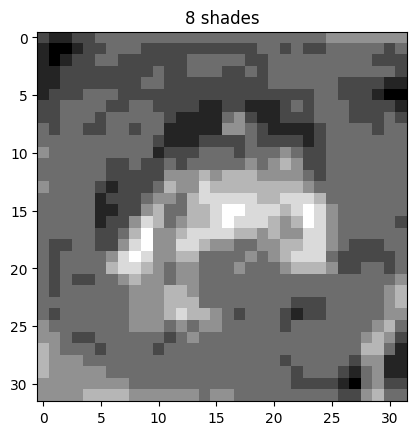

In [44]:
plt.title('8 shades', fontsize=12)
plt.imshow(x_train_gray_8s[0], cmap = 'gray')
plt.show()

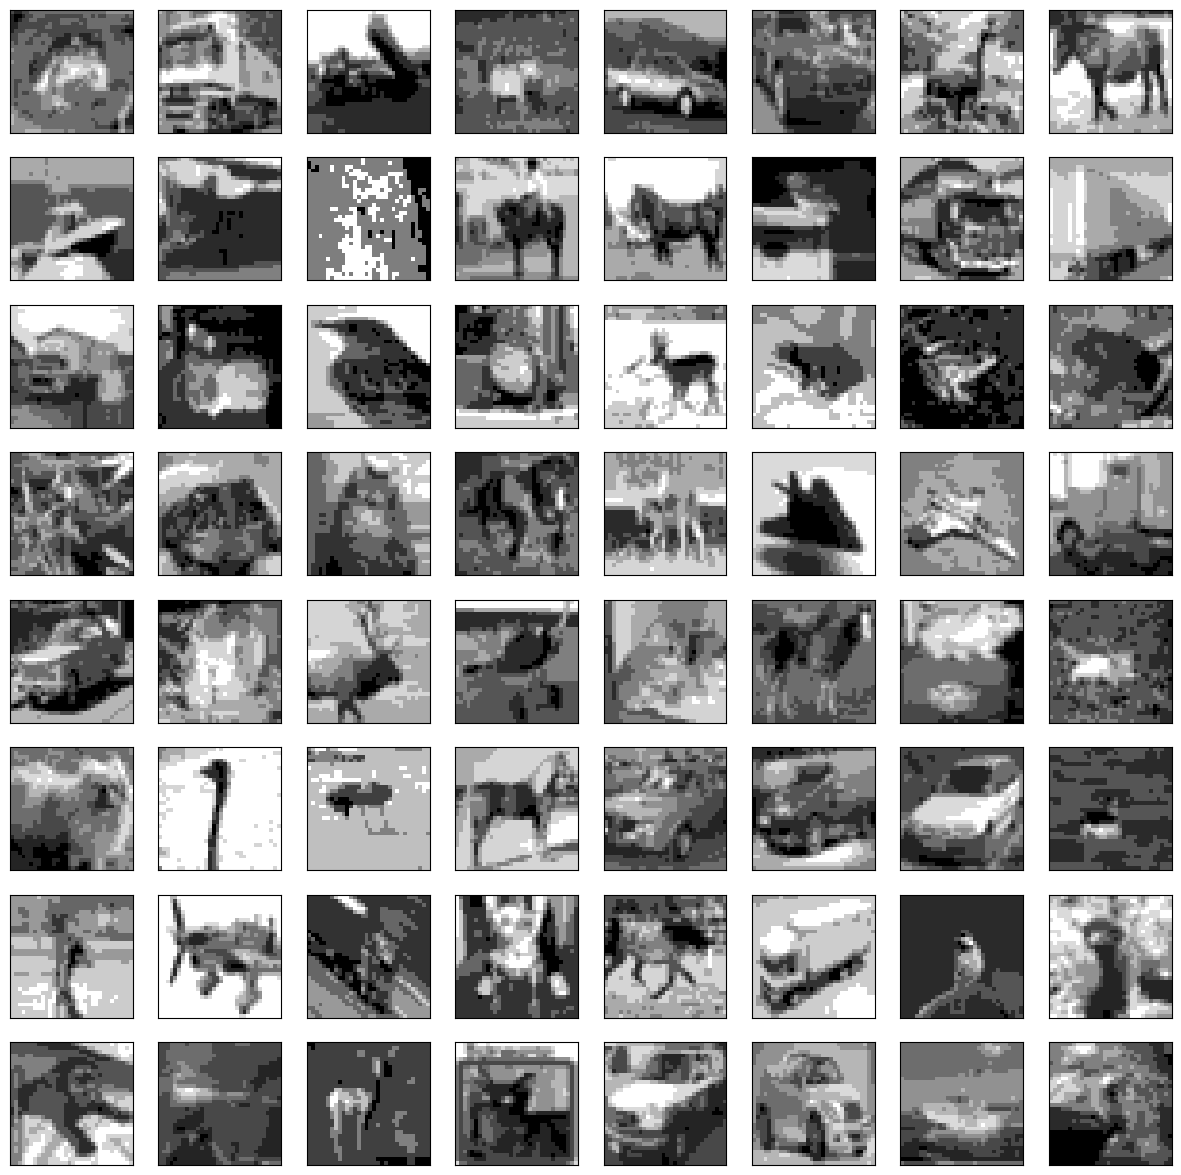

In [45]:
# Create a new figure
plt.figure(figsize=(15,15))

# Loop over the first 25 images
for i in range(64):
    # Create a subplot for each image
    plt.subplot(8, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Display the image
    plt.imshow(x_train_gray_8s[i], cmap='gray')



# Display the figure
plt.show()

### Test set

In [46]:
x_test_gray_8s = x_test_gray.copy()

In [47]:
for i in range(len(x_test_gray_8s)):
  for j in range(len(x_test_gray_8s[i])):
    for k in range(len(x_test_gray_8s[i][j])):
      if x_test_gray_8s[i][j][k] >= 0 and x_test_gray_8s[i][j][k] < 18.23:
        x_test_gray_8s[i][j][k] = 0
      elif x_test_gray_8s[i][j][k] >= 18.23 and x_test_gray_8s[i][j][k] < 54.70:
        x_test_gray_8s[i][j][k] = 36
      elif x_test_gray_8s[i][j][k] >= 54.70 and x_test_gray_8s[i][j][k] < 91.16:
        x_test_gray_8s[i][j][k] = 72
      elif x_test_gray_8s[i][j][k] >= 91.16 and x_test_gray_8s[i][j][k] < 127.63:
        x_test_gray_8s[i][j][k] = 109
      elif x_test_gray_8s[i][j][k] >= 127.63 and x_test_gray_8s[i][j][k] < 164.09:
        x_test_gray_8s[i][j][k] = 145
      elif x_test_gray_8s[i][j][k] >= 164.09 and x_test_gray_8s[i][j][k] < 200.56:
        x_test_gray_8s[i][j][k] = 182
      elif x_test_gray_8s[i][j][k] >= 200.56 and x_test_gray_8s[i][j][k] < 237.02:
        x_test_gray_8s[i][j][k] = 218
      else:
        x_test_gray_8s[i][j][k] = 255

In [48]:
x_test_gray_8s[0]

array([[109., 109., 109., ..., 109., 109.,  72.],
       [109., 109., 109., ..., 109., 109.,  72.],
       [109., 109., 109., ..., 109., 109., 109.],
       ...,
       [109.,  72.,  72., ...,  72.,  36.,  72.],
       [109., 109.,  72., ...,  72.,  72.,  72.],
       [109., 109.,  72., ...,  72.,  72.,  72.]])

In [49]:
len(x_test_gray_8s)

10000

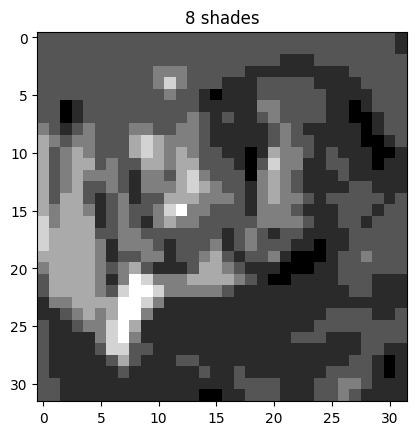

In [50]:
plt.title('8 shades', fontsize=12)
plt.imshow(x_test_gray_8s[0], cmap = 'gray')
plt.show()

In [51]:
np.save('x_train_gray_8s_cifar10', x_train_gray_8s)
np.save('x_test_gray_8s_cifar10', x_test_gray_8s)
np.save('y_train_cifar10', y_train)
np.save('y_test_cifar10', y_test)

In [52]:
np.unique(x_train_gray_8s)

array([  0.,  36.,  72., 109., 145., 182., 218., 255.])

In [53]:
np.unique(x_test_gray_8s)

array([  0.,  36.,  72., 109., 145., 182., 218., 255.])

In [54]:
len(x_train_gray_8s[0][0])

32

# Characterization

### train set

In [5]:
'''
x_train_gray_8s = np.load('x_train_gray_8s_flower.npy')
x_test_gray_8s = np.load('x_train_gray_8s_flower.npy')
y_train_gray_8s = np.load('y_train_flower.npy')
y_test_gray_8s = np.load('y_test_flower.npy')
print(type(x_train_gray_8s))
print(type(x_test_gray_8s))
print(type(y_train_gray_8s))
print(type(y_test_gray_8s))
'''

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [55]:
len(x_test_gray_8s)

10000

In [56]:
char_lst = []
for outer_list in tqdm(x_train_gray_8s, desc="Processing lists"):
    for i in range(0, len(outer_list), 2):
        for j in range(32):
            char_lst.append((outer_list[i][j], outer_list[i+1][j]))

Processing lists: 100%|██████████| 50000/50000 [00:09<00:00, 5339.73it/s]


In [57]:
len(char_lst)

25600000

In [58]:
unique_char_lst = list(set(char_lst))
unique_char_lst

[(0.0, 36.0),
 (145.0, 36.0),
 (218.0, 72.0),
 (182.0, 0.0),
 (218.0, 255.0),
 (0.0, 109.0),
 (72.0, 36.0),
 (218.0, 145.0),
 (0.0, 182.0),
 (145.0, 109.0),
 (218.0, 218.0),
 (255.0, 36.0),
 (145.0, 182.0),
 (72.0, 109.0),
 (0.0, 72.0),
 (145.0, 72.0),
 (255.0, 109.0),
 (182.0, 36.0),
 (72.0, 182.0),
 (145.0, 255.0),
 (0.0, 145.0),
 (72.0, 72.0),
 (145.0, 145.0),
 (182.0, 109.0),
 (109.0, 0.0),
 (72.0, 255.0),
 (0.0, 218.0),
 (36.0, 0.0),
 (72.0, 145.0),
 (255.0, 182.0),
 (255.0, 72.0),
 (145.0, 218.0),
 (182.0, 182.0),
 (255.0, 255.0),
 (255.0, 145.0),
 (182.0, 72.0),
 (72.0, 218.0),
 (182.0, 255.0),
 (109.0, 36.0),
 (182.0, 145.0),
 (255.0, 218.0),
 (109.0, 109.0),
 (36.0, 36.0),
 (182.0, 218.0),
 (218.0, 0.0),
 (36.0, 109.0),
 (109.0, 182.0),
 (109.0, 72.0),
 (36.0, 182.0),
 (109.0, 255.0),
 (36.0, 255.0),
 (36.0, 72.0),
 (109.0, 145.0),
 (0.0, 0.0),
 (218.0, 36.0),
 (36.0, 145.0),
 (109.0, 218.0),
 (145.0, 0.0),
 (218.0, 109.0),
 (36.0, 218.0),
 (72.0, 0.0),
 (218.0, 182.0)]

In [59]:
len(unique_char_lst)

62

### Test set

In [60]:
test_char_lst = []
for outer_list in tqdm(x_test_gray_8s, desc="Processing lists"):
    for i in range(0, len(outer_list), 2):
        for j in range(32):
            test_char_lst.append((outer_list[i][j], outer_list[i+1][j]))

Processing lists: 100%|██████████| 10000/10000 [00:01<00:00, 5583.42it/s]


In [61]:
len(test_char_lst)

5120000

In [62]:
test_unique_char_lst = list(set(test_char_lst))
len(test_unique_char_lst)

60

# Encoding to Alphabets

### Train set

In [63]:
tuple_to_alphabet = {(0, 36): 'A',
 (145, 36): 'B',
 (218, 72): 'C',
 (182, 0): 'D',
 (0, 109): 'E',
 (72, 36): 'F',
 (218, 145): 'G',
 (0, 182): 'H',
 (145, 109): 'I',
 (255, 36): 'J',
 (72, 109): 'K',
 (0, 72): 'L',
 (145, 182): 'M',
 (145, 72): 'N',
 (182, 36): 'O',
 (255, 109): 'P',
 (145, 255): 'Q',
 (0, 145): 'R',
 (72, 182): 'S',
 (109, 0): 'T',
 (182, 109): 'U',
 (72, 255): 'V',
 (0, 218): 'W',
 (36, 0): 'X',
 (255, 182): 'Y',
 (72, 145): 'Z',
 (255, 72): 'a',
 (145, 218): 'b',
 (255, 145): 'c',
 (182, 72): 'd',
 (72, 218): 'e',
 (182, 255): 'f',
 (109, 36): 'g',
 (255, 218): 'h',
 (182, 218): 'i',
 (218, 0): 'j',
 (36, 109): 'k',
 (109, 182): 'l',
 (109, 72): 'm',
 (109, 255): 'n',
 (36, 182): 'o',
 (36, 255): 'p',
 (109, 145): 'q',
 (36, 72): 'r',
 (218, 36): 's',
 (36, 145): 't',
 (109, 218): 'u',
 (145, 0): 'v',
 (218, 109): 'w',
 (36, 218): 'x',
 (72, 0): 'y',
 (218, 182): 'z',
 (0, 0): '0',
 (36, 36): '1',
 (72, 72): '2',
 (109, 109): '3',
 (145, 145): '4',
 (182, 182): '5',
 (218, 218): '6',
 (255, 255): '7',
 (218, 255): '8',
 (182, 145): '9',
 (0, 255): '@',
 (255, 0): '!'}

In [64]:
len(tuple_to_alphabet)

64

In [65]:
for i in range(len(char_lst)):
  if i == 10:
    break
  else:
    print(char_lst[i])

(72.0, 36.0)
(36.0, 0.0)
(36.0, 0.0)
(72.0, 36.0)
(72.0, 72.0)
(109.0, 72.0)
(109.0, 109.0)
(109.0, 109.0)
(109.0, 109.0)
(109.0, 72.0)


In [66]:
for key, value in tqdm(tuple_to_alphabet.items(), desc="Processing lists"):
  for i in range(len(char_lst)):
    if char_lst[i] == key:
      char_lst[i] = value

Processing lists: 100%|██████████| 64/64 [01:59<00:00,  1.86s/it]


In [67]:
for i in range(len(char_lst)):
  if i == 10:
    break
  else:
    print(char_lst[i])

F
X
X
F
2
m
3
3
3
m


In [37]:
len(char_lst)

25600000

In [68]:
# Join all elements in the list into a single string
result_string_train = ''.join(char_lst)

# Specify the file name
file_name = "pixel_document_train_cifar10.txt"

# Write the string to a text file
with open(file_name, 'w') as file:
    file.write(result_string_train)

In [69]:
len(result_string_train)

25600000

### Test set

In [70]:
for i in range(len(test_char_lst)):
  if i == 10:
    break
  else:
    print(test_char_lst[i])

(109.0, 109.0)
(109.0, 109.0)
(109.0, 109.0)
(109.0, 109.0)
(109.0, 109.0)
(109.0, 109.0)
(109.0, 109.0)
(109.0, 109.0)
(109.0, 109.0)
(109.0, 109.0)


In [71]:
for key, value in tqdm(tuple_to_alphabet.items(), desc="Processing lists"):
  for i in range(len(test_char_lst)):
    if test_char_lst[i] == key:
      test_char_lst[i] = value

Processing lists: 100%|██████████| 64/64 [00:25<00:00,  2.49it/s]


In [72]:
for i in range(len(test_char_lst)):
  if i == 10:
    break
  else:
    print(test_char_lst[i])

3
3
3
3
3
3
3
3
3
3


In [73]:
len(test_char_lst)

5120000

In [74]:
# Join all elements in the list into a single string
result_string_test = ''.join(test_char_lst)

# Specify the file name
file_name = "pixel_document_test_cifar10.txt"

# Write the string to a text file
with open(file_name, 'w') as file:
    file.write(result_string_test)

In [75]:
len(result_string_test)

5120000

# Vocabulary Creatiion

In [76]:
document_set = []
for i in range(0, len(result_string_train), 32):
  chunk = result_string_train[i:i+32]
  document_set.append(chunk)

In [77]:
document_set[:16]

['FXXF2m333mmmmmmmmmm33m3mmIIIIINI',
 '1Ar22mm222K22333mmK2333333333KK2',
 '1r22KKK22mm222222222mmmm33222FXX',
 '22333mKK33K2FF11KZr112m2333222Kr',
 '3K33KK33K3m111rrNN32rrr123333K33',
 'I33333mm3mrK2K333Kq3qMq223333333',
 'q3333mF222KM44iM555MMMMqK3333333',
 '333331F22qMI35z6886iiz68iq333333',
 '33333r2KM89qMii6hzzG549h6433333K',
 '32K33KZb8h44zzUII3qI45i66Im222m3',
 '323mm3UGz94344333I333IUUUIKK33Kq',
 '3K33333344455M33333333mmm3333345',
 'qK333333444UGU943K3332kKK3333qMI',
 'M43KKm3333mK3I33333333333333M5IF',
 '5444qq333333333333333Km333mFI411',
 '4444MMMMqqqqqq3qq33333KKKKrLqMKK']

In [78]:
len(document_set[0])

32

In [79]:
len(document_set)

800000

In [80]:
def update_dictionary(my_dict, key):
    if key in my_dict:
        my_dict[key] += 1
    else:
        my_dict[key] = 1
    return my_dict

### Bigram

In [81]:
from tqdm import tqdm
bi_words_freq = {}

for i in tqdm(range(len(document_set))):
  for j in range(len(document_set[i])):
    if j == len(document_set[i])-1:
        break
    else:
      update_dictionary(bi_words_freq, document_set[i][j]+document_set[i][j+1])

len(bi_words_freq)

100%|██████████| 800000/800000 [00:07<00:00, 108116.14it/s]


2432

### Trigram

In [82]:
tri_words_freq = {}
from tqdm import tqdm

for i in tqdm(range(len(document_set))):
  for j in range(len(document_set[i])):
    if j == len(document_set[i])-2:
        break
    else:
      update_dictionary(tri_words_freq, document_set[i][j]+document_set[i][j+1]+document_set[i][j+2])
len(tri_words_freq)

100%|██████████| 800000/800000 [00:08<00:00, 89707.86it/s]


46894

### Fourgram

In [83]:
four_words_freq = {}
from tqdm import tqdm

for i in tqdm(range(len(document_set))):
  for j in range(len(document_set[i])):
    if j == len(document_set[i])-3:
        break
    else:
      update_dictionary(four_words_freq, document_set[i][j]+document_set[i][j+1]+document_set[i][j+2]+document_set[i][j+3])
len(four_words_freq)

100%|██████████| 800000/800000 [00:12<00:00, 65176.58it/s]


361890

### Fivegram

In [84]:
five_words_freq = {}
from tqdm import tqdm

for i in tqdm(range(len(document_set))):
  for j in range(len(document_set[i])):
    if j == len(document_set[i])-4:
        break
    else:
      update_dictionary(five_words_freq, document_set[i][j]+document_set[i][j+1]+document_set[i][j+2]+document_set[i][j+3]+document_set[i][j+4])
len(five_words_freq)

100%|██████████| 800000/800000 [00:14<00:00, 55167.52it/s]


1349740

### Processing

In [85]:
def sorting(dictionary):
  sorted_dict = dict(sorted(dictionary.items(), key=lambda item: item[1], reverse=True))
  return sorted_dict

In [86]:
sorted_bigram = sorting(bi_words_freq)
sorted_trigram = sorting(tri_words_freq)
sorted_fourgram = sorting(four_words_freq)
sorted_fivegram = sorting(five_words_freq)

In [99]:
list(sorted_bigram.items())[1699]

('9T', 17)

In [108]:
list(sorted_trigram.items())[17000]

('X3z', 14)

In [113]:
list(sorted_fourgram.items())[70000]

('q964', 10)

In [116]:
list(sorted_fivegram.items())[180000]

('yX01r', 6)

In [91]:
sorted_fivegram

{'44444': 928186,
 '33333': 883220,
 '55555': 744993,
 '22222': 686472,
 '66666': 535762,
 '11111': 529280,
 '77777': 433441,
 '00000': 196111,
 'qqqqq': 38896,
 'IIIII': 36414,
 'KKKKK': 36184,
 '4444I': 35221,
 'q4444': 35046,
 '4444q': 35023,
 'I4444': 34710,
 'm2222': 33998,
 '2222K': 33761,
 '2222m': 33539,
 'K2222': 33429,
 'K3333': 32927,
 '3333K': 32815,
 '22223': 32663,
 '32222': 32314,
 'q3333': 32307,
 'I3333': 32304,
 'mmmmm': 32197,
 '3333q': 32188,
 '44443': 32068,
 '3333m': 31971,
 '11112': 31773,
 '99999': 31756,
 '3333I': 31664,
 '34444': 31617,
 'm3333': 31565,
 '21111': 31564,
 '1111r': 31156,
 'r1111': 31030,
 'MMMMM': 30877,
 'F1111': 30377,
 '1111F': 30137,
 '33332': 29599,
 '23333': 29395,
 '95555': 28235,
 '55559': 28030,
 '43333': 27400,
 '33334': 27392,
 'rrrrr': 26484,
 'M5555': 25823,
 '5555M': 25647,
 '55554': 25364,
 '45555': 24746,
 '22333': 23770,
 '22233': 23662,
 '33322': 23396,
 'FFFFF': 23261,
 '33222': 23182,
 '4444M': 22807,
 'M4444': 22780,
 '9444

In [118]:
bigram = dict(list(sorted_bigram.items())[:1700])
trigram = dict(list(sorted_trigram.items())[:17000])
fourgram = dict(list(sorted_fourgram.items())[:70000])
fivegram = dict(list(sorted_fivegram.items())[:180000])

In [119]:
del fivegram['00000']
del fourgram['0000']
del trigram['000']
del bigram['00']

del fivegram['11111']
del fourgram['1111']
del trigram['111']
del bigram['11']

del fivegram['22222']
del fourgram['2222']
del trigram['222']
del bigram['22']

del fivegram['33333']
del fourgram['3333']
del trigram['333']
del bigram['33']

del fivegram['44444']
del fourgram['4444']
del trigram['444']
del bigram['44']

del fivegram['55555']
del fourgram['5555']
del trigram['555']
del bigram['55']

del fivegram['66666']
del fourgram['6666']
del trigram['666']
del bigram['66']

del fivegram['77777']
del fourgram['7777']
del trigram['777']
del bigram['77']

In [120]:
def should_remove(key):
    # Check for more than 2 consecutive digits 0-7 at the start or end
    pattern = r'^[0-7]{1,}|[0-7]{1,}$'
    return bool(re.search(pattern, key))

# Filter the dictionary
filtered_trigram = {k: v for k, v in trigram.items() if not should_remove(k)}

In [121]:
def should_remove(key):
    # Check for more than 2 consecutive digits 0-7 at the start or end
    pattern = r'^[0-7]{2,}|[0-7]{2,}$'
    return bool(re.search(pattern, key))

# Filter the dictionary
filtered_fourgram = {k: v for k, v in fourgram.items() if not should_remove(k)}

In [122]:
def should_remove(key):
    # Check for more than 2 consecutive digits 0-7 at the start or end
    pattern = r'^[0-7]{3,}|[0-7]{3,}$'
    return bool(re.search(pattern, key))

# Filter the dictionary
filtered_fivegram = {k: v for k, v in fivegram.items() if not should_remove(k)}

In [123]:
list_of_vocabs = list(filtered_fivegram.keys()) + list(filtered_fourgram.keys()) + list(filtered_trigram.keys()) + list(bigram.keys())

In [124]:
len(list_of_vocabs)

211674

In [125]:
import json
with open('vocabs_cifar10.json', 'w') as file:
    json.dump(list_of_vocabs, file)


# Training Tokenization and Training Data

In [126]:
def build_trie(priority_lists):
    trie = {}
    for word in priority_lists:
        node = trie
        for char in word:
            node = node.setdefault(char, {})
        node['$'] = word
    return trie

def match_and_extract(text, trie):
    result = []
    i = 0
    while i < len(text):
        node = trie
        end = i
        last_match = None
        for j in range(i, len(text)):
            if text[j] not in node:
                break
            node = node[text[j]]
            if '$' in node:
                last_match = node['$']
                end = j + 1
        if last_match:
            result.append(last_match)
            i = end
        else:
            i += 1
    return result

def preprocess_vocabs(list_of_vocabs):
    trie = build_trie(list_of_vocabs)
    vocab_dict = defaultdict(list)
    for word in list_of_vocabs:
        if word:
            vocab_dict[word[0]].append(word)
    return trie, vocab_dict

def tokenize_documents(document_set, list_of_vocabs):
    trie, vocab_dict = preprocess_vocabs(list_of_vocabs)
    tokenized_documents = []

    for document in tqdm(document_set):
        tokenized_documents.append(match_and_extract(document, trie))

    return tokenized_documents

# Usage
tokenized_documents = tokenize_documents(document_set, list_of_vocabs)

100%|██████████| 800000/800000 [00:10<00:00, 78326.44it/s] 


In [127]:
len(tokenized_documents)

800000

In [128]:
document = []
for i in range(0, len(tokenized_documents), 16):
  group = tokenized_documents[i:i+16]
  tokens = ''
  for j in group:
    tokens = ' '.join(j)
    document.append(tokens)

training_document = []
for i in range(0, len(document), 16):
  group = document[i:i+16]
  tokens = ' '.join(group)
  training_document.append(tokens)

In [129]:
document[:16]

['FXXF2 m333m mmmmm mmmm3 3m3mm IIIII NI',
 '1Ar22 mm 22K22 33mmK 23 33KK2',
 '1r22K KK22m m2 22mmm m3 32 22FXX',
 '23 33mKK 33K2F F11KZ r112m 23 32 2K',
 '3K33K K33K3 m111r rNN 32rrr 12 33K33',
 'I3 33mm3 mrK2K 33Kq3 qMq22',
 'q3 33mF2 22KM4 4iM55 5MMMM qK',
 '31F22 qMI3 5z688 6iiz6 8iq33',
 '33r2K M8 9qMii 6hzzG 549h6 43 3K',
 '32K33 KZb8 h4 4zzU II3qI 45i66 Im 2m',
 '32 3mm3U Gz943 43 33I33 3IUUU IKK33 Kq',
 '3K 34 45 5M 33mmm 34',
 'qK 34 4UGU 943K3 32kKK 33qMI',
 'M43KK m3 33mK3 I3 33M5I',
 '54 44qq3 33Km3 33mFI 41',
 '44MMM Mqqqq qq3qq 33KKK KrL qMKK']

In [130]:
training_document[0]

'FXXF2 m333m mmmmm mmmm3 3m3mm IIIII NI 1Ar22 mm 22K22 33mmK 23 33KK2 1r22K KK22m m2 22mmm m3 32 22FXX 23 33mKK 33K2F F11KZ r112m 23 32 2K 3K33K K33K3 m111r rNN 32rrr 12 33K33 I3 33mm3 mrK2K 33Kq3 qMq22 q3 33mF2 22KM4 4iM55 5MMMM qK 31F22 qMI3 5z688 6iiz6 8iq33 33r2K M8 9qMii 6hzzG 549h6 43 3K 32K33 KZb8 h4 4zzU II3qI 45i66 Im 2m 32 3mm3U Gz943 43 33I33 3IUUU IKK33 Kq 3K 34 45 5M 33mmm 34 qK 34 4UGU 943K3 32kKK 33qMI M43KK m3 33mK3 I3 33M5I 54 44qq3 33Km3 33mFI 41 44MMM Mqqqq qq3qq 33KKK KrL qMKK'

In [131]:
len(training_document)

50000

# Testing Tokenization and Testing Data

In [132]:
test_document_set = []
for i in range(0, len(result_string_test), 32):
  chunk = result_string_test[i:i+32]
  test_document_set.append(chunk)

In [133]:
test_document_set[:16]

['33333333333333333333333333333332',
 '3333333333qqq33333mmm222mmm33333',
 '3333333333IGI3mg22233333K222m333',
 '3312333333333qK2K22I43333221Fm33',
 'MqKq4333Mblq44322222343K22221Fm3',
 '5345M3q3Uz545M33K21Ki44m23K221r2',
 '5345II43244q56Mq33r4543222mKK222',
 '5q55q234K3qif94II32494Im2m333mK3',
 '6M555K34qKIUII33m3qINIIm22m3K333',
 'z555542II4q233qMKmI3qmFF12K3q333',
 'I55554m4fuZZZl55MqK2F1rr22333mmm',
 'm9955Ml87hGNNNNNm2222222222mm222',
 'K2mI94i7YN22222222222222K3333KK3',
 '32222I6hIK222222222222mmm22233mm',
 '322222mUm222mmK22K2222222KK33212',
 '33222222222222FF2m333222334Im222']

In [134]:
len(test_document_set)

160000

In [135]:
test_tokenized_documents = tokenize_documents(test_document_set, list_of_vocabs)

100%|██████████| 160000/160000 [00:02<00:00, 70563.93it/s]


In [136]:
document = []
for i in range(0, len(test_tokenized_documents), 16):
  group = test_tokenized_documents[i:i+16]
  tokens = ''
  for j in group:
    tokens = ' '.join(j)
    document.append(tokens)

testing_document = []
for i in range(0, len(document), 16):
  group = document[i:i+16]
  tokens = ' '.join(group)
  testing_document.append(tokens)

In [137]:
document[:16]

['32',
 '33qqq 33mmm 22mmm',
 '33IGI 3mg22 23 33K22 2m',
 '31 23 33qK2 K22I4 32 21Fm3',
 'MqKq4 33Mbl q4 43 23 43K22 21Fm3',
 '53 45M3q 3Uz54 5M33K 21 Ki 44m23 K221r',
 '53 45II4 32 44q56 Mq33r 45 43 22mKK',
 '5q 55q23 4K3q if 94II3 2494I m2m33 3mK3',
 '6M 55K34 qKIU II33m 3qINI Im22m 3K',
 'z5 54 2II4q 23 3qMK mI3q mFF12 K3q33',
 'I5 54 m4f uZZZ l55Mq K2F1r r2 23 33mmm',
 'm9955 Ml 87hG NNNNN m2 22mm2',
 'K2mI9 4i 7YN22 22K33 33KK3',
 '32 22I6h IK 22mmm 23 3m',
 '32 22mUm 22mmK 22K22 22KK3 32 12',
 '32 22FF2 m3 32 23 34Im2']

In [138]:
testing_document[0]

'32 33qqq 33mmm 22mmm 33IGI 3mg22 23 33K22 2m 31 23 33qK2 K22I4 32 21Fm3 MqKq4 33Mbl q4 43 23 43K22 21Fm3 53 45M3q 3Uz54 5M33K 21 Ki 44m23 K221r 53 45II4 32 44q56 Mq33r 45 43 22mKK 5q 55q23 4K3q if 94II3 2494I m2m33 3mK3 6M 55K34 qKIU II33m 3qINI Im22m 3K z5 54 2II4q 23 3qMK mI3q mFF12 K3q33 I5 54 m4f uZZZ l55Mq K2F1r r2 23 33mmm m9955 Ml 87hG NNNNN m2 22mm2 K2mI9 4i 7YN22 22K33 33KK3 32 22I6h IK 22mmm 23 3m 32 22mUm 22mmK 22K22 22KK3 32 12 32 22FF2 m3 32 23 34Im2'

In [139]:
len(testing_document)

10000

In [140]:
with open('training_document_cifar10.json', 'w') as file:
    json.dump(training_document, file)
with open('testing_document_cifar10.json', 'w') as file:
    json.dump(testing_document, file)

# Classification

In [143]:
y_train = y_train.tolist()
y_train = [item for sublist in y_train for item in sublist]
y_train

[6,
 9,
 9,
 4,
 1,
 1,
 2,
 7,
 8,
 3,
 4,
 7,
 7,
 2,
 9,
 9,
 9,
 3,
 2,
 6,
 4,
 3,
 6,
 6,
 2,
 6,
 3,
 5,
 4,
 0,
 0,
 9,
 1,
 3,
 4,
 0,
 3,
 7,
 3,
 3,
 5,
 2,
 2,
 7,
 1,
 1,
 1,
 2,
 2,
 0,
 9,
 5,
 7,
 9,
 2,
 2,
 5,
 2,
 4,
 3,
 1,
 1,
 8,
 2,
 1,
 1,
 4,
 9,
 7,
 8,
 5,
 9,
 6,
 7,
 3,
 1,
 9,
 0,
 3,
 1,
 3,
 5,
 4,
 5,
 7,
 7,
 4,
 7,
 9,
 4,
 2,
 3,
 8,
 0,
 1,
 6,
 1,
 1,
 4,
 1,
 8,
 3,
 9,
 6,
 6,
 1,
 8,
 5,
 2,
 9,
 9,
 8,
 1,
 7,
 7,
 0,
 0,
 6,
 9,
 1,
 2,
 2,
 9,
 2,
 6,
 6,
 1,
 9,
 5,
 0,
 4,
 7,
 6,
 7,
 1,
 8,
 1,
 1,
 2,
 8,
 1,
 3,
 3,
 6,
 2,
 4,
 9,
 9,
 5,
 4,
 3,
 6,
 7,
 4,
 6,
 8,
 5,
 5,
 4,
 3,
 1,
 8,
 4,
 7,
 6,
 0,
 9,
 5,
 1,
 3,
 8,
 2,
 7,
 5,
 3,
 4,
 1,
 5,
 7,
 0,
 4,
 7,
 5,
 5,
 1,
 0,
 9,
 6,
 9,
 0,
 8,
 7,
 8,
 8,
 2,
 5,
 2,
 3,
 5,
 0,
 6,
 1,
 9,
 3,
 6,
 9,
 1,
 3,
 9,
 6,
 6,
 7,
 1,
 0,
 9,
 5,
 8,
 5,
 2,
 9,
 0,
 8,
 8,
 0,
 6,
 9,
 1,
 1,
 6,
 3,
 7,
 6,
 6,
 0,
 6,
 6,
 1,
 7,
 1,
 5,
 8,
 3,
 6,
 6,
 8,
 6,
 8,
 4,
 6,
 6,


In [144]:
y_test = y_test.tolist()
y_test = [item for sublist in y_test for item in sublist]
y_test

[3,
 8,
 8,
 0,
 6,
 6,
 1,
 6,
 3,
 1,
 0,
 9,
 5,
 7,
 9,
 8,
 5,
 7,
 8,
 6,
 7,
 0,
 4,
 9,
 5,
 2,
 4,
 0,
 9,
 6,
 6,
 5,
 4,
 5,
 9,
 2,
 4,
 1,
 9,
 5,
 4,
 6,
 5,
 6,
 0,
 9,
 3,
 9,
 7,
 6,
 9,
 8,
 0,
 3,
 8,
 8,
 7,
 7,
 4,
 6,
 7,
 3,
 6,
 3,
 6,
 2,
 1,
 2,
 3,
 7,
 2,
 6,
 8,
 8,
 0,
 2,
 9,
 3,
 3,
 8,
 8,
 1,
 1,
 7,
 2,
 5,
 2,
 7,
 8,
 9,
 0,
 3,
 8,
 6,
 4,
 6,
 6,
 0,
 0,
 7,
 4,
 5,
 6,
 3,
 1,
 1,
 3,
 6,
 8,
 7,
 4,
 0,
 6,
 2,
 1,
 3,
 0,
 4,
 2,
 7,
 8,
 3,
 1,
 2,
 8,
 0,
 8,
 3,
 5,
 2,
 4,
 1,
 8,
 9,
 1,
 2,
 9,
 7,
 2,
 9,
 6,
 5,
 6,
 3,
 8,
 7,
 6,
 2,
 5,
 2,
 8,
 9,
 6,
 0,
 0,
 5,
 2,
 9,
 5,
 4,
 2,
 1,
 6,
 6,
 8,
 4,
 8,
 4,
 5,
 0,
 9,
 9,
 9,
 8,
 9,
 9,
 3,
 7,
 5,
 0,
 0,
 5,
 2,
 2,
 3,
 8,
 6,
 3,
 4,
 0,
 5,
 8,
 0,
 1,
 7,
 2,
 8,
 8,
 7,
 8,
 5,
 1,
 8,
 7,
 1,
 3,
 0,
 5,
 7,
 9,
 7,
 4,
 5,
 9,
 8,
 0,
 7,
 9,
 8,
 2,
 7,
 6,
 9,
 4,
 3,
 9,
 6,
 4,
 7,
 6,
 5,
 1,
 5,
 8,
 8,
 0,
 4,
 0,
 5,
 5,
 1,
 1,
 8,
 9,
 0,
 3,
 1,
 9,
 2,
 2,


In [145]:
unique_elements = set(y_train)
unique_elements

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

## Feature-Based Naive Bayes

In [146]:
from collections import defaultdict
import math

class NaiveBayes:
    def __init__(self):
        self.class_counts = defaultdict(int)
        self.feature_counts = defaultdict(lambda: defaultdict(int))
        self.vocab = set()

    def train(self, documents, labels):
        for doc, label in zip(documents, labels):
            self.class_counts[label] += 1
            features = self.extract_features(doc)
            for feature in features:
                self.feature_counts[label][feature] += 1
                self.vocab.add(feature)

    def extract_features(self, document):
        return document.split()

    def predict(self, document):
        features = self.extract_features(document)
        best_label = None
        best_score = float('-inf')

        for label in self.class_counts:
            score = math.log(self.class_counts[label])
            for feature in features:
                if feature in self.vocab:
                    score += math.log((self.feature_counts[label][feature] + 1) /
                                      (self.class_counts[label] + len(self.vocab)))
            if score > best_score:
                best_score = score
                best_label = label

        return best_label

    def evaluate(self, test_documents, test_labels):
        predictions = [self.predict(doc) for doc in test_documents]

        # Calculate confusion matrix
        confusion_matrix = defaultdict(lambda: defaultdict(int))
        for true_label, pred_label in zip(test_labels, predictions):
            confusion_matrix[true_label][pred_label] += 1

        # Calculate metrics
        accuracy = sum(1 for true, pred in zip(test_labels, predictions) if true == pred) / len(test_labels)

        metrics = {}
        for label in set(test_labels):
            tp = confusion_matrix[label][label]
            fp = sum(confusion_matrix[other][label] for other in confusion_matrix if other != label)
            fn = sum(confusion_matrix[label][other] for other in confusion_matrix[label] if other != label)

            precision = tp / (tp + fp) if (tp + fp) > 0 else 0
            recall = tp / (tp + fn) if (tp + fn) > 0 else 0
            f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

            metrics[label] = {
                'precision': precision,
                'recall': recall,
                'f1': f1
            }

        # Calculate macro-averaged metrics
        macro_precision = sum(m['precision'] for m in metrics.values()) / len(metrics)
        macro_recall = sum(m['recall'] for m in metrics.values()) / len(metrics)
        macro_f1 = sum(m['f1'] for m in metrics.values()) / len(metrics)

        return {
            'accuracy': accuracy,
            'class_metrics': metrics,
            'macro_precision': macro_precision,
            'macro_recall': macro_recall,
            'macro_f1': macro_f1
        }


classifier = NaiveBayes()
classifier.train(training_document, y_train)

evaluation_results = classifier.evaluate(testing_document, y_test)

print("Evaluation Results:")
print(f"Accuracy: {evaluation_results['accuracy']:.2f}")
print("\nClass-wise Metrics:")
for label, metrics in evaluation_results['class_metrics'].items():
    print(f"  {label}:")
    print(f"    Precision: {metrics['precision']:.2f}")
    print(f"    Recall: {metrics['recall']:.2f}")
    print(f"    F1-score: {metrics['f1']:.2f}")
print("\nMacro-averaged Metrics:")
print(f"Precision: {evaluation_results['macro_precision']:.2f}")
print(f"Recall: {evaluation_results['macro_recall']:.2f}")
print(f"F1-score: {evaluation_results['macro_f1']:.2f}")

Evaluation Results:
Accuracy: 0.30

Class-wise Metrics:
  0:
    Precision: 0.75
    Recall: 0.02
    F1-score: 0.04
  1:
    Precision: 0.38
    Recall: 0.32
    F1-score: 0.35
  2:
    Precision: 0.21
    Recall: 0.01
    F1-score: 0.02
  3:
    Precision: 0.25
    Recall: 0.19
    F1-score: 0.21
  4:
    Precision: 0.23
    Recall: 0.52
    F1-score: 0.32
  5:
    Precision: 0.28
    Recall: 0.43
    F1-score: 0.34
  6:
    Precision: 0.33
    Recall: 0.54
    F1-score: 0.41
  7:
    Precision: 0.34
    Recall: 0.30
    F1-score: 0.32
  8:
    Precision: 0.53
    Recall: 0.10
    F1-score: 0.17
  9:
    Precision: 0.30
    Recall: 0.54
    F1-score: 0.39

Macro-averaged Metrics:
Precision: 0.36
Recall: 0.30
F1-score: 0.26


## TF-IDF

In [147]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


# Step 3: Create TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Step 4: Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(training_document)

# Step 5: Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(testing_document)

### Naive Bayes

In [148]:
# Step 6: Create and train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Step 7: Make predictions on the test set
y_pred = nb_classifier.predict(X_test_tfidf)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.31

Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.17      0.24      1000
           1       0.44      0.29      0.35      1000
           2       0.20      0.12      0.15      1000
           3       0.26      0.22      0.24      1000
           4       0.21      0.70      0.32      1000
           5       0.33      0.33      0.33      1000
           6       0.52      0.23      0.32      1000
           7       0.43      0.21      0.29      1000
           8       0.39      0.45      0.42      1000
           9       0.37      0.38      0.37      1000

    accuracy                           0.31     10000
   macro avg       0.36      0.31      0.30     10000
weighted avg       0.36      0.31      0.30     10000



### SVM-linear

In [150]:
from sklearn.svm import SVC

# Step 6: Create and train the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_tfidf, y_train)

# Step 7: Make predictions on the test set
y_pred = svm_classifier.predict(X_test_tfidf)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.39

Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.45      0.41      1000
           1       0.42      0.46      0.44      1000
           2       0.24      0.20      0.22      1000
           3       0.28      0.26      0.27      1000
           4       0.37      0.39      0.38      1000
           5       0.37      0.35      0.36      1000
           6       0.44      0.52      0.48      1000
           7       0.43      0.36      0.39      1000
           8       0.45      0.44      0.44      1000
           9       0.44      0.42      0.43      1000

    accuracy                           0.39     10000
   macro avg       0.38      0.39      0.38     10000
weighted avg       0.38      0.39      0.38     10000



### SVM-rbf

In [151]:
from sklearn.svm import SVC

# Step 6: Create and train the SVM classifier
svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X_train_tfidf, y_train)

# Step 7: Make predictions on the test set
y_pred = svm_classifier.predict(X_test_tfidf)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.38

Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.46      0.41      1000
           1       0.39      0.49      0.43      1000
           2       0.27      0.17      0.21      1000
           3       0.29      0.23      0.26      1000
           4       0.38      0.38      0.38      1000
           5       0.36      0.35      0.35      1000
           6       0.41      0.55      0.47      1000
           7       0.43      0.36      0.39      1000
           8       0.45      0.44      0.44      1000
           9       0.42      0.41      0.41      1000

    accuracy                           0.38     10000
   macro avg       0.38      0.38      0.38     10000
weighted avg       0.38      0.38      0.38     10000



### Logistic Regression

In [149]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

# Step 7: Make predictions on the test set
y_pred = lr_model.predict(X_test_tfidf)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.39

Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.42      0.39      1000
           1       0.42      0.47      0.45      1000
           2       0.26      0.17      0.21      1000
           3       0.31      0.24      0.27      1000
           4       0.37      0.37      0.37      1000
           5       0.37      0.35      0.36      1000
           6       0.40      0.56      0.47      1000
           7       0.41      0.38      0.40      1000
           8       0.44      0.45      0.45      1000
           9       0.42      0.43      0.43      1000

    accuracy                           0.39     10000
   macro avg       0.38      0.39      0.38     10000
weighted avg       0.38      0.39      0.38     10000



### MLP

In [152]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler


# Step 6: Scale the features
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train_tfidf)
X_test_scaled = scaler.transform(X_test_tfidf)

# Step 7: Create and train the MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50),
                               max_iter=500,
                               activation='relu',
                               solver='adam',
                               random_state=42)
mlp_classifier.fit(X_train_scaled, y_train)

# Step 8: Make predictions on the test set
y_pred = mlp_classifier.predict(X_test_scaled)

# Step 9: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.25

Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.13      0.18      1000
           1       0.27      0.27      0.27      1000
           2       0.17      0.21      0.19      1000
           3       0.17      0.24      0.20      1000
           4       0.27      0.27      0.27      1000
           5       0.25      0.20      0.22      1000
           6       0.33      0.30      0.32      1000
           7       0.23      0.26      0.24      1000
           8       0.38      0.32      0.35      1000
           9       0.26      0.32      0.29      1000

    accuracy                           0.25     10000
   macro avg       0.26      0.25      0.25     10000
weighted avg       0.26      0.25      0.25     10000



### Decision Tree

In [153]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_tfidf, y_train)

# Step 7: Make predictions on the test set
y_pred = dt_classifier.predict(X_test_tfidf)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.19

Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.27      0.28      1000
           1       0.22      0.22      0.22      1000
           2       0.14      0.14      0.14      1000
           3       0.14      0.13      0.13      1000
           4       0.19      0.18      0.18      1000
           5       0.15      0.16      0.16      1000
           6       0.22      0.22      0.22      1000
           7       0.13      0.13      0.13      1000
           8       0.21      0.21      0.21      1000
           9       0.18      0.18      0.18      1000

    accuracy                           0.19     10000
   macro avg       0.19      0.19      0.19     10000
weighted avg       0.19      0.19      0.19     10000



### Random Forest

In [154]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_tfidf, y_train)

# Step 7: Make predictions on the test set
y_pred = rf_classifier.predict(X_test_tfidf)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.31

Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.58      0.40      1000
           1       0.32      0.41      0.36      1000
           2       0.22      0.19      0.21      1000
           3       0.25      0.15      0.18      1000
           4       0.31      0.30      0.30      1000
           5       0.30      0.23      0.26      1000
           6       0.37      0.44      0.40      1000
           7       0.34      0.16      0.22      1000
           8       0.38      0.30      0.34      1000
           9       0.29      0.33      0.31      1000

    accuracy                           0.31     10000
   macro avg       0.31      0.31      0.30     10000
weighted avg       0.31      0.31      0.30     10000



### XGBoost

In [155]:
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train_tfidf, y_train)

y_pred = xgb_classifier.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.34

Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.48      0.43      1000
           1       0.37      0.43      0.40      1000
           2       0.25      0.20      0.22      1000
           3       0.25      0.21      0.23      1000
           4       0.32      0.29      0.30      1000
           5       0.31      0.29      0.30      1000
           6       0.39      0.47      0.43      1000
           7       0.34      0.31      0.32      1000
           8       0.39      0.38      0.39      1000
           9       0.34      0.36      0.35      1000

    accuracy                           0.34     10000
   macro avg       0.34      0.34      0.34     10000
weighted avg       0.34      0.34      0.34     10000

